딥러닝 파이토치 교과서 ch2. 4 p.69~87

### **[개념 정리+코드 필사]📝**

### **2.4 파이토치 코드 맛보기**

- car_evaluation.csv: price, maint(자동차 유지비용), doors(자동차 문 개수), persons(수용 인원), lug_capacity(수화물 용량), safety(안전성), **output(차 상태)**
  - 단어는 벡터로 바꾸는 임베딩 처리가 필요
  - 데이터셋 분포 시각화(파이차트): 대부분(70%)의 자동차는 허용 불가능한 상태. 양호한 상태의 비율이 매우 낮음

(1) 전처리: 딥러닝을 위해 단어를 텐서로 변환.
  - 범주형 데이터 -> astype('category') 범주형 타입으로 변환 -> dataset[category].cat.codes.values -> 넘파이 배열 -> 텐서(Tensor)로 변환
    - cat.codes로 범주형 데이터를 숫자(넘파이 배열)로 변환
    - np.stack()으로 넘파이 배열을 합침
    - torch.tensor()로 텐서 변환
    - output 칼럼(y)은 get_dummies로 넘파이 배열 변환 후 tensor 변환

(2) 워드 임베딩: 유사한 단어끼리 유사하게 인코딩. 높은 차원의 임베딩일수록 세부적 관계 파악가능 > 단일 숫자의 넘파이 배열을 N차원으로 변환
  - 임베딩 크기 정의(칼럼 고유값/2)
  - 임베딩 사이즈: (범주형 칼럼의 고유값 수, 차원의 크기)

(3) 훈련/테스트 데이터셋 분리

(4) 모델의 네트워크 생성
  - 클래스 형태로 nn.Module 상속받음(class Model(nn.Module))
  - __ init __(): 모델에서 사용될 파라미터와 신경망 초기화. 객체 생성 시 자동 호출
    - def __ init __(self, embedding_size, output_size, layers, p=0.4)
      - self: 자기자신
      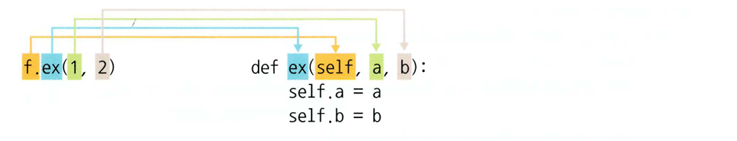
      - 범주형 칼럼의 임베딩 크기, 출력층 크기, 모든 계층 목록, p=드롭아웃(기본 0.5)
  - super().__ init__(): 부모 클래스 nn.Module에 접근
  - for문으로 각 계층을 all_layers목록에 추가, 네트워크 계층 구축
     - Linear:선형계층(선형변환 결과), ReLU: 활성화 함수, BatchNorm1d: 배치 정규화, Dropout: 과적합 방지
  - forward()로 학습 데이터 입력받아 연산 진행. 객체를 데이터와 호출하면 자동 진행

(5) 모델 클래스 객체 생성, (범주형 칼럼 임베딩 크기, 출력 크기, 은닉층 뉴런, 드롭아웃) 전달. -> 모델에 대한 구조 확인가능
- 손실함수, 옵티마이저 정의: 분류이므로 크로스 엔트로피 손실 함수 사용. 아담 옵티마이저 사용
- 파이토치는 GPU 최적화 딥러닝 프레임워크이므로 GPU사용.(없으면 CPU사용)

(6) 모델 학습
  - 25 에포크마다 오차정보 출력되게 함

(7) 테스트 데이터셋으로 예측 진행
  - 테스트 데이터셋에 대한 Loss값 확인. 훈련 데이터셋의 Loss값과 비슷하면 과적합 발생X 판단
  - output_size(출력층의 뉴런 개수)만큼 예측값이 포함됨
  - np.argmax로 가장 큰 값의 인덱스 확인 -> 결과 해석

(8) 테스트 데이터셋의 정확도 확인
  - classification_report, confusion_matrix, accuracy_score로 정확도, 정밀도, 재현율 확인
  - 파라미퍼 변경해보며 더 나은 성능 찾아보기


✅ 딥러닝 분류 모델의 성능 평가 지표:

- 정확도: 전체 예측 건수 중 정답을 맞힌 건수의 비율
$$
\frac{\text{True Positive + True Negative}}{\text{True Positive + True Negative + False Positive + False Negative}}
$$

- 재현율: 실제 1일때 모델도 1로 예측한 비율
$$
\frac{\text{True Positive}}{\text{True Positive + False Negative}}
$$

- 정밀도: 모델이 1로 예측한 것 중 실제 1인 비율
$$
\frac{\text{True Positive}}{\text{True Positive + False Positive}}
$$

- F1 스코어
  - 정밀도와 재현율은 트레이드오프 관계이므로 정밀도와 재현율의 조화 평균을 이용

$$
2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}}
$$



[ note ]

[ [ 1 , 2 ] , [ 3 , 4 ] ] 와 [ [ 5 , 6 ] , [ 7 , 8 ] ] 합칠때
- np.stack은 배열들을 새로운 축으로 합침(두 배열의 차원이 동일해야함)
```
[[[ 1,2 ],
    [ 3,4 ]],
   [[ 5,6 ],
    [ 7,8 ]]]
```

- np.concatenate는 선택한 축 기준으로 두개의 배열을 연결
```
[[ 1,2 ],
   [ 3,4 ],
   [ 5,6 ],
   [ 7,8 ]]
```


In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
file_uploaded = files.upload()
dataset = pd.read_csv('car_evaluation.csv')

Saving car_evaluation.csv to car_evaluation.csv


In [3]:
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

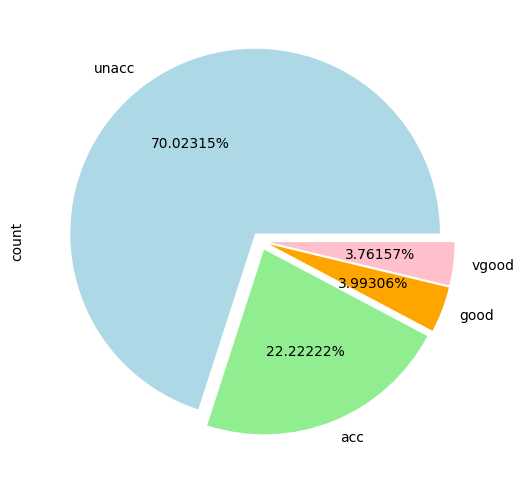

In [4]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['figure.figsize'] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',colors=['lightblue','lightgreen','orange','pink'], explode=(0.05, 0.05, 0.05,0.05))

In [5]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [6]:
# 배열을 텐서로 전환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [7]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [8]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]

print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [9]:
# 데이터 셋 분리
total_records = 1728
test_records = int(total_records * .2) # 전체 데이터 중 20%를 테스트 용으로 사용

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [13]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [14]:
# 모델의 네트워크 생성
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [15]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [16]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [18]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.59677064
epoch:  26 loss: 1.40557182
epoch:  51 loss: 1.30664039
epoch:  76 loss: 1.19314444
epoch: 101 loss: 1.05938745
epoch: 126 loss: 0.92847782
epoch: 151 loss: 0.82167983
epoch: 176 loss: 0.75231820
epoch: 201 loss: 0.69268686
epoch: 226 loss: 0.64931989
epoch: 251 loss: 0.62938678
epoch: 276 loss: 0.60301661
epoch: 301 loss: 0.59902871
epoch: 326 loss: 0.59540874
epoch: 351 loss: 0.58061761
epoch: 376 loss: 0.58876204
epoch: 401 loss: 0.58360976
epoch: 426 loss: 0.57066357
epoch: 451 loss: 0.58058637
epoch: 476 loss: 0.56800056
epoch: 500 loss: 0.5708557963


In [19]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.56945556


In [20]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 2.1607,  1.0212, -2.9654, -3.3218],
        [ 2.2602,  1.3195, -2.6310, -2.7454],
        [ 0.5183,  0.3535, -0.9380, -0.5110],
        [ 2.1481,  0.9941, -2.7687, -2.6871],
        [ 2.2305,  1.2427, -3.0041, -3.1666]])


In [21]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

[0 0 0 0 0]


In [22]:
# 테스트 데이터셋을 이용한 정확도 확인
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[258   1   0]
 [ 84   1   1]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.50      0.01      0.02        86
           3       0.00      0.00      0.00         0

    accuracy                           0.75       345
   macro avg       0.42      0.34      0.29       345
weighted avg       0.69      0.75      0.65       345

0.7507246376811594
